# Use Case : EDA of Automobile Dataset

You can access the data in this link .[Dataset](https://archive.ics.uci.edu/ml/datasets/automobile)
<br>
##### From the informatiof data, we know that.  data set consists of three types of entities: 
1. the specification of an auto in terms of various characteristics,
2. its assigned insurance risk rating
3. its normalized losses in use as compared to other cars. 

The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

* * * 

In [1]:
# Import the Library
import pandas as pd
import numpy as np

### Import the Data
Before we analyze the data, we need to import the data. Using *df.head()* function, we can see the head of the data frame (top).

In [2]:
# Normalized losses in uses as compared to other cars
losses = pd.read_csv('Automobile/automobile-losses.csv')
losses.head()

,ID,normalized-losses
0,1,NaN
1,2,NaN
2,3,NaN
3,4,164.0
4,5,164.0


In [3]:
# Insurance risk rating 
risk = pd.read_csv('Automobile/automobile-risk.csv')
risk.head(3)

,ID,symboling
0,1,3
1,2,3
2,3,1


In [4]:
# Car specification information 
spec = pd.read_csv('Automobile/automobile-spec.csv')
spec.head(3)

,ID,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


# Part 1 
1. Join 3 tables using ID as key <br>
2. Quick-look (dimension, data type, head/tail, summary statistics, etc) <br>
3. Identify missing value. If any, how will you handle it? <br>
4. Perform visualization using at least 5.  Difference visualization technique (barplot, scatter plot, area, boxplot, pie chart, line chart, etc) <br>

### 1. Join 3 tables using ID as key
There are 3 different data set that we need to combine, first. Column "ID" become the main coulum. 

In [5]:
df = pd.merge(losses, risk,
             how = 'left',
             on = 'ID')
df = pd.merge(df, spec,
             how = 'inner',
             on = 'ID')
df.head()

,ID,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,2,NaN,3,alfa-romero,gas,std,two,convertible,rwd,front,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,3,NaN,1,alfa-romero,gas,std,two,hatchback,rwd,front,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,4,164.0,2,audi,gas,std,four,sedan,fwd,front,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,5,164.0,2,audi,gas,std,four,sedan,4wd,front,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


### 2. Quick-look (dimension, data type, head/tail, summary statistics, etc)
After all the dataset already in a frame, we need to know more about the data.

In [6]:
df.shape

(205, 27)

In [7]:
df.dtypes

ID                     int64
normalized-losses    float64
symboling              int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheel           object
engine-loc            object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
cylinder              object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower           float64
peak-rpm             float64
city-mpg               int64
highway-mpg            int64
price                float64
dtype: object

From *df.dtypes* function we know the data type for every column. But there are some column that have a different type from the information of the data. So we need to convert data types that do not match the information. 
<br>
<br>
Examples of variables that are not appropriate are symboling variables. 
<br>
Based on information, symboling variable is the risk level of each customer consisting of 7 different levels (-3, -2, -1, 0, 1, 2, 3). Then it can be seen that the symboling variable is a variable with object data type or categorical variable. Whereas the *df.dtypes* function detects that variable is a variable with an integer data type.

In [8]:
df['symboling'] = df.symboling.astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
ID                   205 non-null int64
normalized-losses    164 non-null float64
symboling            205 non-null object
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         204 non-null object
body-style           205 non-null object
drive-wheel          205 non-null object
engine-loc           205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
cylinder             205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 201 non-null float64
stroke               201 non-null float64
compression-ratio    205 non-n

### 3. Identify missing value. If any, how will you handle it?

Before we analyze the data, we need to pre-processing the data. One of the pre-processing process is to identify missing value of the data. If there are missing value in numerical data, we can imput the missing data using mean or median. But if there are missing value in categorical data, we can input mode to fill the missing. The other way to handle missing value is delete a row of data (if there the missing value < 60%). 

In [9]:
#count how many missing values per field
np.sum(df.isnull())

ID                    0
normalized-losses    41
symboling             0
make                  0
fuel-type             0
aspiration            0
num-of-doors          1
body-style            0
drive-wheel           0
engine-loc            0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
cylinder              0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [12]:
#count how many missing values per field (order)
df.isnull().sum().sort_values(ascending = False).head(8)

normalized-losses    41
price                 4
stroke                4
bore                  4
peak-rpm              2
horsepower            2
num-of-doors          1
wheel-base            0
dtype: int64

In [16]:
df.describe()

,ID,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,164.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,201.000000,201.000000,205.000000,203.000000,203.000000,205.000000,205.000000,201.000000
mean,103.000000,122.000000,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329751,3.255423,10.142537,104.256158,5125.369458,25.219512,30.751220,13207.129353
std,59.322565,35.442168,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273539,0.316717,3.972040,39.714369,479.334560,6.542142,6.886443,7947.066342
min,1.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,94.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,103.000000,115.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.590000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,205.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [17]:
# Fill missing value with mean - for numerical data
df = df.fillna((df.mean()))
df.isnull().sum().sort_values(ascending = False).head(8)

num-of-doors         1
price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
dtype: int64

In [18]:
# mode of the categorical data
from scipy.stats import mode
df['num-of-doors'].fillna(df['num-of-doors']).dropna().mode()[0]

'four'

In [19]:
# if we want to impute mode in missing categorical data 
## df['num-of-doors'] = df_merge['num-of-doors'].fillna(df_merge['num-of-doors'].mode().values[0])

After we imputation missing value using mean, there are still one missing value in num-of-doors variable. It means that variable is categorical data. Because of the missing only 1 from 205 data, I prefer to delete a row of the data. I think that doesn't reduce much information from the data that already exists.

In [20]:
df = df.dropna()
df.isnull().sum().sort_values(ascending = False).head(8)

price                0
width                0
normalized-losses    0
symboling            0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
dtype: int64

In [21]:
# Set customer_id Index
df_id = df.set_index('ID')
df_id.head(3)

,normalized-losses,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
ID,,,,,,,,,,,,,,,,,,,,,
1,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
2,122.0,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
3,122.0,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0


In [38]:
kategorik=['symboling', 'make','fuel-type','aspiration', 'num-of-doors', 
           'body-style', 'drive-wheel', 'engine-loc', 'engine-type', 'cylinder', 'fuel-system' ]
numerical=df_id.drop(kategorik,axis=1)
categorical=df_id[kategorik]
numerical.describe()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.00000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000,204.000000
mean,121.872549,98.781373,174.131373,65.918137,53.740196,2557.352941,127.04902,3.331221,3.254763,10.155000,104.267217,5123.533034,25.225490,30.754902,13229.919203
std,31.706217,6.026096,12.311367,2.145361,2.439646,521.330463,41.69556,0.270690,0.314226,3.977791,39.616111,477.425419,6.557674,6.903182,7881.340541
min,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.00000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,101.000000,94.500000,166.675000,64.100000,52.000000,2145.000000,97.00000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7784.750000
50%,122.000000,97.000000,173.200000,65.500000,54.100000,2417.000000,120.00000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10646.500000
75%,137.000000,102.400000,183.200000,66.900000,55.500000,2939.250000,142.00000,3.582500,3.410000,9.400000,116.000000,5500.000000,30.000000,34.500000,16500.000000
max,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.00000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [23]:
categorical.describe()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheel,engine-loc,engine-type,cylinder,fuel-system
count,204,204,204,204,204,204,204,204,204,204,204
unique,6,22,2,2,3,5,3,2,7,7,8
top,0,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,32,184,168,114,95,119,201,147,158,93


In [24]:
numerical.shape

(204, 15)

In [25]:
categorical.shape

(204, 11)

### 4. Perform visualization using at least 5. Difference visualization technique (barplot, scatter plot, area, boxplot, pie chart, line chart, etc) 

In [26]:
#visualization
import matplotlib.pyplot as plt 
import seaborn as sns 

The another tools to know the characteristics of every variable is using visualization. In this section, univariat visualization for numerical data is using **Distribution Plot** and for categorical data is using **Bar Plot**. To know the correlation each variable is using **Correlation Plot**. After we know the correlation plot, I use **Scatter Plot** to know the unique relationship two variable that we know from correlation plot. I use **Box Plot** to know the character of *price* based on several categorical data. 

#### Distribution Plot

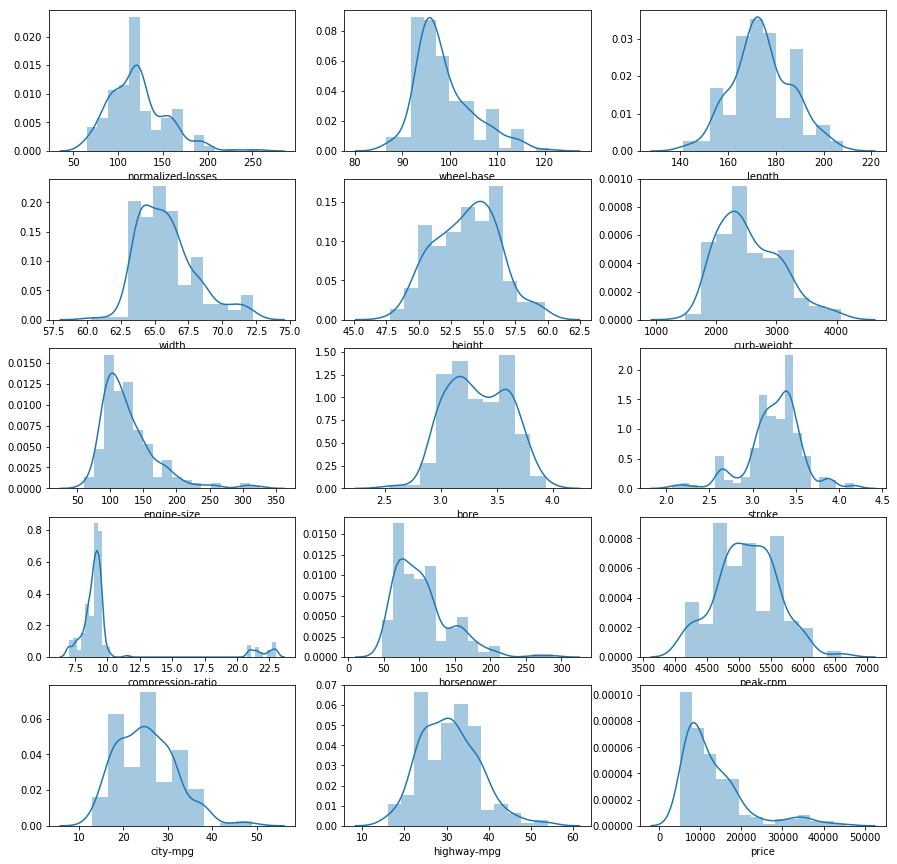

In [27]:
f=plt.figure(figsize=(15,15))
f.add_subplot(5,3,1)
sns.distplot(numerical['normalized-losses'])
f.add_subplot(5,3,2)
sns.distplot(numerical['wheel-base'])
f.add_subplot(5,3,3)
sns.distplot(numerical['length'])
f.add_subplot(5,3,4)
sns.distplot(numerical['width'])
f.add_subplot(5,3,5)
sns.distplot(numerical['height'])
f.add_subplot(5,3,6)
sns.distplot(numerical['curb-weight'])
f.add_subplot(5,3,7)
sns.distplot(numerical['engine-size'])
f.add_subplot(5,3,8)
sns.distplot(numerical['bore'])
f.add_subplot(5,3,9)
sns.distplot(numerical['stroke'])
f.add_subplot(5,3,10)
sns.distplot(numerical['compression-ratio'])
f.add_subplot(5,3,11)
sns.distplot(numerical['horsepower'])
f.add_subplot(5,3,12)
sns.distplot(numerical['peak-rpm'])
f.add_subplot(5,3,13)
sns.distplot(numerical['city-mpg'])
f.add_subplot(5,3,14)
sns.distplot(numerical['highway-mpg'])
f.add_subplot(5,3,15)
sns.distplot(numerical['price'])

#### Count Plot

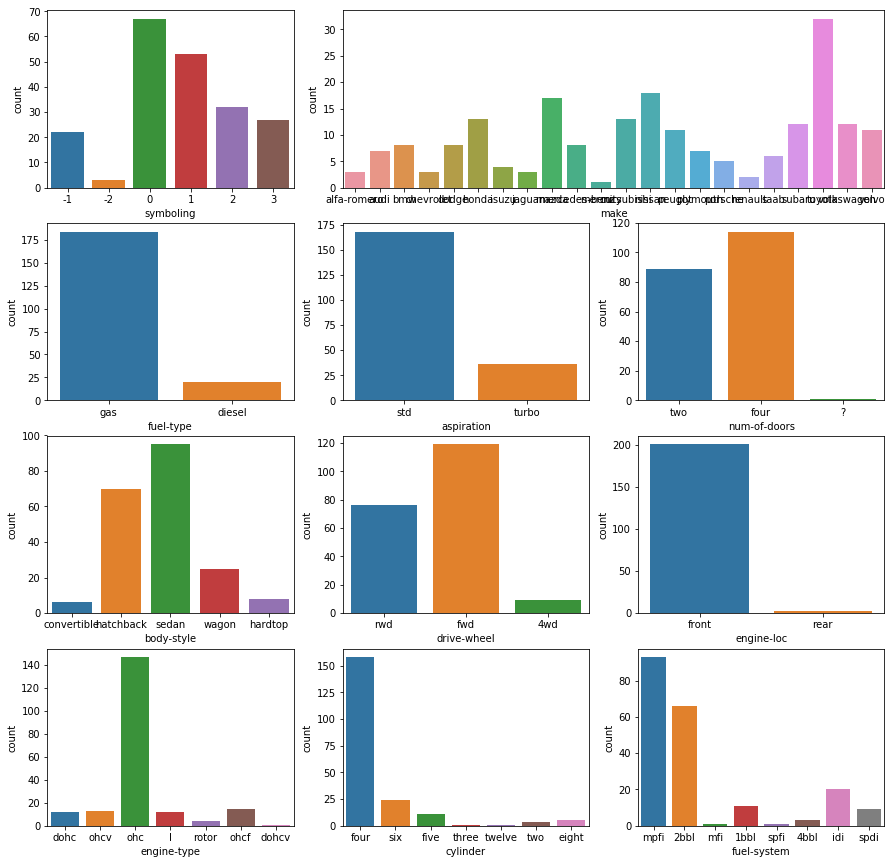

In [28]:
f=plt.figure(figsize=(15,15))
f.add_subplot(4,3,1)
sns.countplot(categorical['symboling'])
f.add_subplot(4,3,(2,3))
sns.countplot(categorical['make'])
f.add_subplot(4,3,4)
sns.countplot(categorical['fuel-type'])
f.add_subplot(4,3,5)
sns.countplot(categorical['aspiration'])
f.add_subplot(4,3,6)
sns.countplot(categorical['num-of-doors'])
f.add_subplot(4,3,7)
sns.countplot(categorical['body-style'])
f.add_subplot(4,3,8)
sns.countplot(categorical['drive-wheel'])
f.add_subplot(4,3,9)
sns.countplot(categorical['engine-loc'])
f.add_subplot(4,3,10)
sns.countplot(categorical['engine-type'])
f.add_subplot(4,3,11)
sns.countplot(categorical['cylinder'])
f.add_subplot(4,3,12)
sns.countplot(categorical['fuel-system'])

#### Correlation Plot

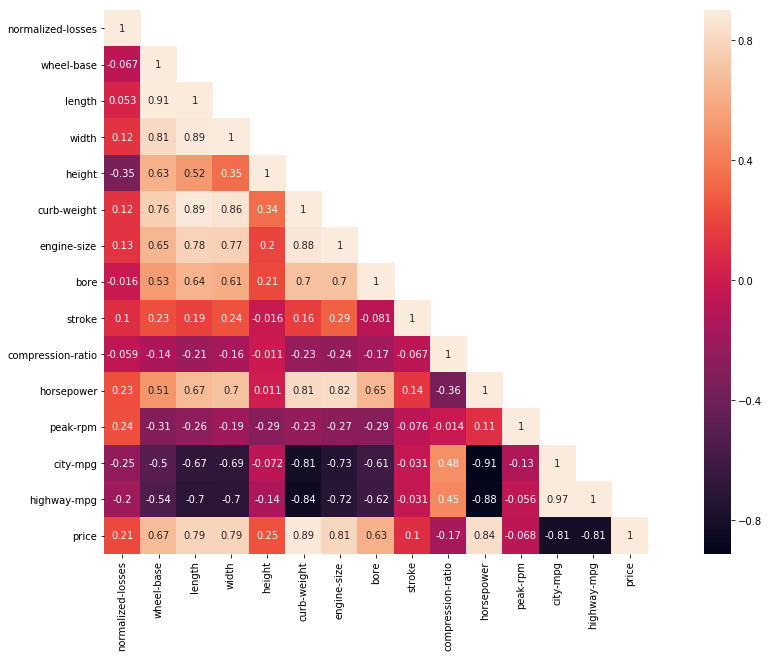

In [29]:
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
#create correlation with hitmap

#create correlation
corr = df_id.corr(method = 'spearman')

#convert correlation to numpy array
mask = np.array(corr)

#to mask the repetitive value for each pair
mask[np.tril_indices_from(mask)] = False
fig, ax = plt.subplots(figsize = (15,12))
fig.set_size_inches(20,10)
sns.heatmap(corr, 
            mask = mask, 
            vmax = 0.9, 
            square = True, 
            annot = True)

#### Scatter Plot

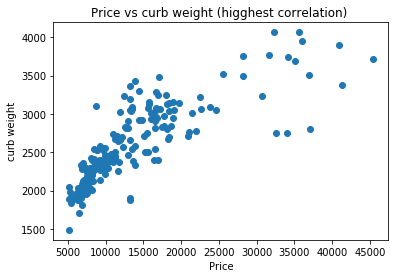

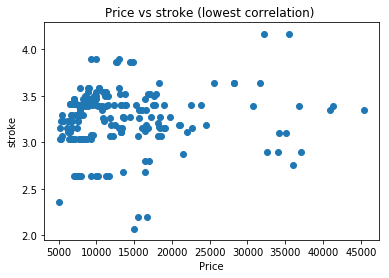

In [30]:
plt.scatter(df_id['price'],df_id['curb-weight'])
plt.title('Price vs curb weight (higghest correlation) ')
plt.xlabel('Price')
plt.ylabel('curb weight')
plt.show()

plt.scatter(df_id['price'],df_id['stroke'])
plt.title('Price vs stroke (lowest correlation) ')
plt.xlabel('Price')
plt.ylabel('stroke')
plt.show()

#### Pair Plot

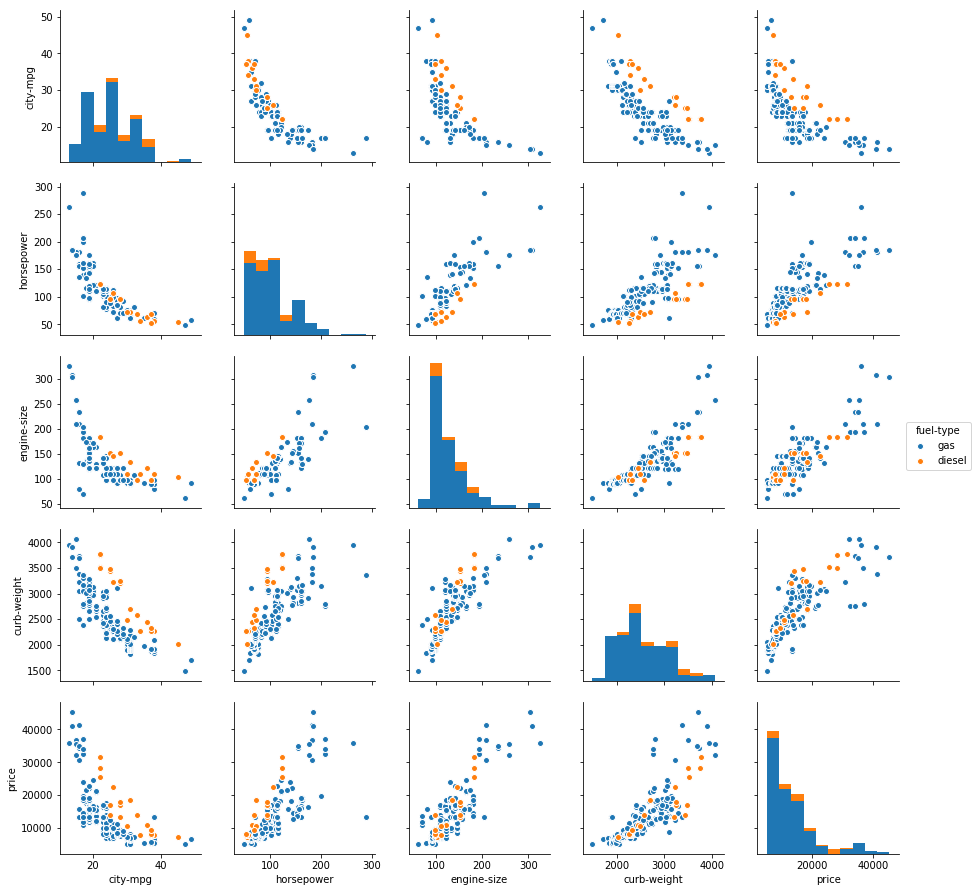

In [31]:
sns.pairplot(df_id[["city-mpg", "horsepower", "engine-size", "curb-weight","price", "fuel-type"]], hue="fuel-type", diag_kind="hist")

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]), <a list of 22 Text xticklabel objects>)

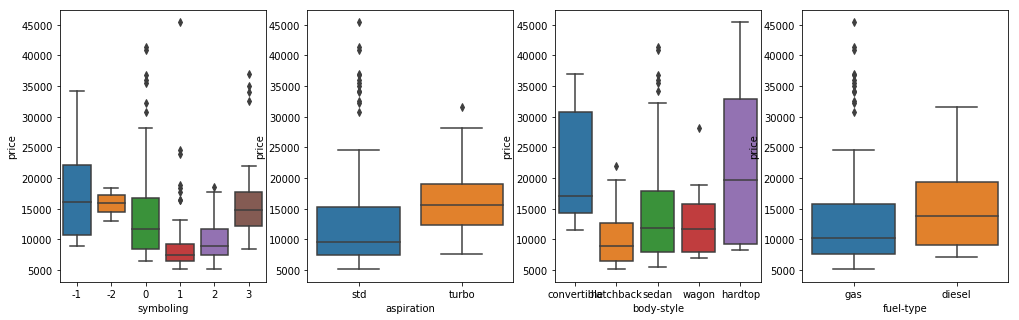

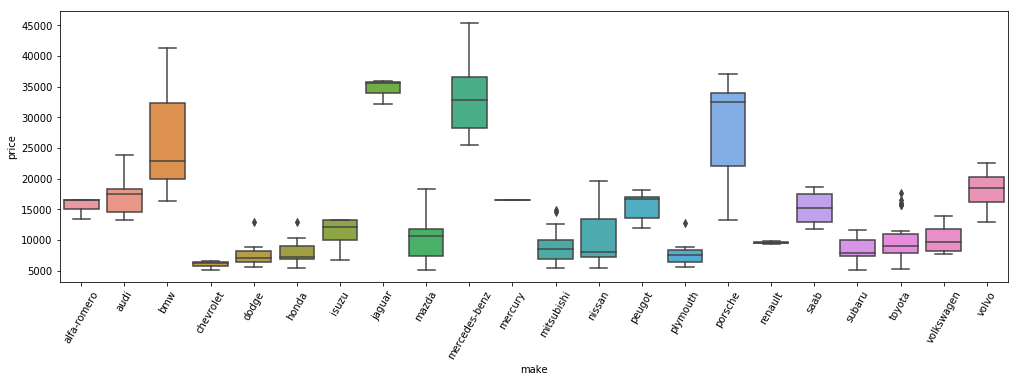

In [32]:
f=plt.figure(figsize=(17,5))
f.add_subplot(1,4,1)
sns.boxplot(y=df_id["price"], x=df_id['symboling'])
f.add_subplot(1,4,2)
sns.boxplot(y=df_id["price"], x=df_id['aspiration'])
f.add_subplot(1,4,3)
sns.boxplot(y=df_id["price"], x=df_id['body-style'])
f.add_subplot(1,4,4)
sns.boxplot(y=df_id["price"], x=df_id['fuel-type'])
f=plt.figure(figsize=(17,5))
f.add_subplot(1,1,1)
sns.boxplot(y=df_id["price"], x=df_id['make'])
plt.xticks(rotation=60)

# Part 2 
Find answer for below question 
1. Car brand with highest price 
2. Maximum horsepower for car with 6 cylinder engine 
3. Average peak-rpm for ‘turbo’ style aspiration car 
4. Average price based on body-style 
5. Average price based on body-style only for Honda car (make=Honda)

#### 1. Car brand with highest price

In [33]:
highest_price = df_id.sort_values(by=['price'], ascending=False).head(1)
highest_price = highest_price[['make', 'price']]
highest_price.rename (columns = {'make':'Brand', 'price':'Highest Price'})

,Brand,Highest Price
ID,,
75,mercedes-benz,45400.0


#### 2. Maximum horsepower for car with 6 cylinder engine 

In [34]:
df_6 = (df_id[df_id.cylinder == 'six'])
df_6.sort_values(by=['horsepower'], ascending=False).head(3)[['horsepower']]

,horsepower
ID,
127,207.0
129,207.0
128,207.0


#### 3. Average peak-rpm for ‘turbo’ style aspiration car

In [35]:
df_turbo = (df_id[df_id.aspiration == 'turbo'])
df_turbo = round(df_turbo[['peak-rpm']].mean(),2)
print('Average peak-rpm for ‘turbo’ style aspiration car =' ,df_turbo[0])

Average peak-rpm for ‘turbo’ style aspiration car = 4923.61


#### 4. Average price based on body-style 

In [36]:
pd.DataFrame(df_id.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
convertible,21890.50
hardtop,22208.50
hatchback,10050.29
sedan,14495.51
wagon,12371.96


#### 5. Average price based on body-style only for Honda car (make=Honda)

In [37]:
df_honda = (df_id[df_id.make == 'honda'])
pd.DataFrame(df_honda.groupby(['body-style']).mean().round(2)['price'])

,price
body-style,
hatchback,7054.43
sedan,9945.00
wagon,7295.00
